In [1]:
import pandas as pd 
data=pd.read_csv("imdb.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Poster          10000 non-null  object 
 1   Title           10000 non-null  object 
 2   Year            9850 non-null   float64
 3   Certificate     7370 non-null   object 
 4   Duration (min)  9664 non-null   float64
 5   Genre           9993 non-null   object 
 6   Rating          9596 non-null   float64
 7   Metascore       7555 non-null   float64
 8   Director        9995 non-null   object 
 9   Cast            9961 non-null   object 
 10  Votes           9596 non-null   object 
 11  Description     10000 non-null  object 
 12  Review Count    9999 non-null   object 
 13  Review Title    9483 non-null   object 
 14  Review          9484 non-null   object 
dtypes: float64(4), object(11)
memory usage: 1.1+ MB


By loading and inspecting the IMDb dataset, we can understand its structure and data types. This information guides us in selecting suitable plotting techniques to visually analyze and interpret the data effectively.

In [2]:
data=data.drop(['Poster','Review Title','Description','Review'],axis=1)

The dataset has been refined by removing columns like 'Poster', 'Description', 'Review Title', and 'Review' to focus on essential movie attributes for analysis. This simplification streamlines the data for clearer and more effective plotting and visualization, emphasizing key information without unnecessary details.

In [3]:
data.head()

,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Review Count
0,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744",166
1,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248",183
2,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401",333
3,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",384
4,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517",194


In [4]:
# Change the data type of a column to numeric
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')
data['Review Count'] = pd.to_numeric(data['Review Count'], errors='coerce')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           10000 non-null  object 
 1   Year            9850 non-null   float64
 2   Certificate     7370 non-null   object 
 3   Duration (min)  9664 non-null   float64
 4   Genre           9993 non-null   object 
 5   Rating          9596 non-null   float64
 6   Metascore       7555 non-null   float64
 7   Director        9995 non-null   object 
 8   Cast            9961 non-null   object 
 9   Votes           559 non-null    float64
 10  Review Count    9565 non-null   float64
dtypes: float64(6), object(5)
memory usage: 859.5+ KB


the data types of specific columns like 'Year', 'Votes', and 'Review Count' are converted to numeric for consistency and accuracy in data representation.so we convert them from object to numeric type.

**Plotting**:

Now, as we proceed with plotting the data, we aim to visually represent and analyze the movie dataset's key attributes such as ratings, votes, and review counts. Plotting allows us to uncover patterns, trends, and relationships within the data that may not be immediately apparent from raw numbers. By creating visualizations, we can gain insights, identify correlations, and communicate findings effectively, enabling a deeper understanding of the dataset and facilitating data-driven decision-making in various domains such as movie analysis, market trends, and audience preferences.

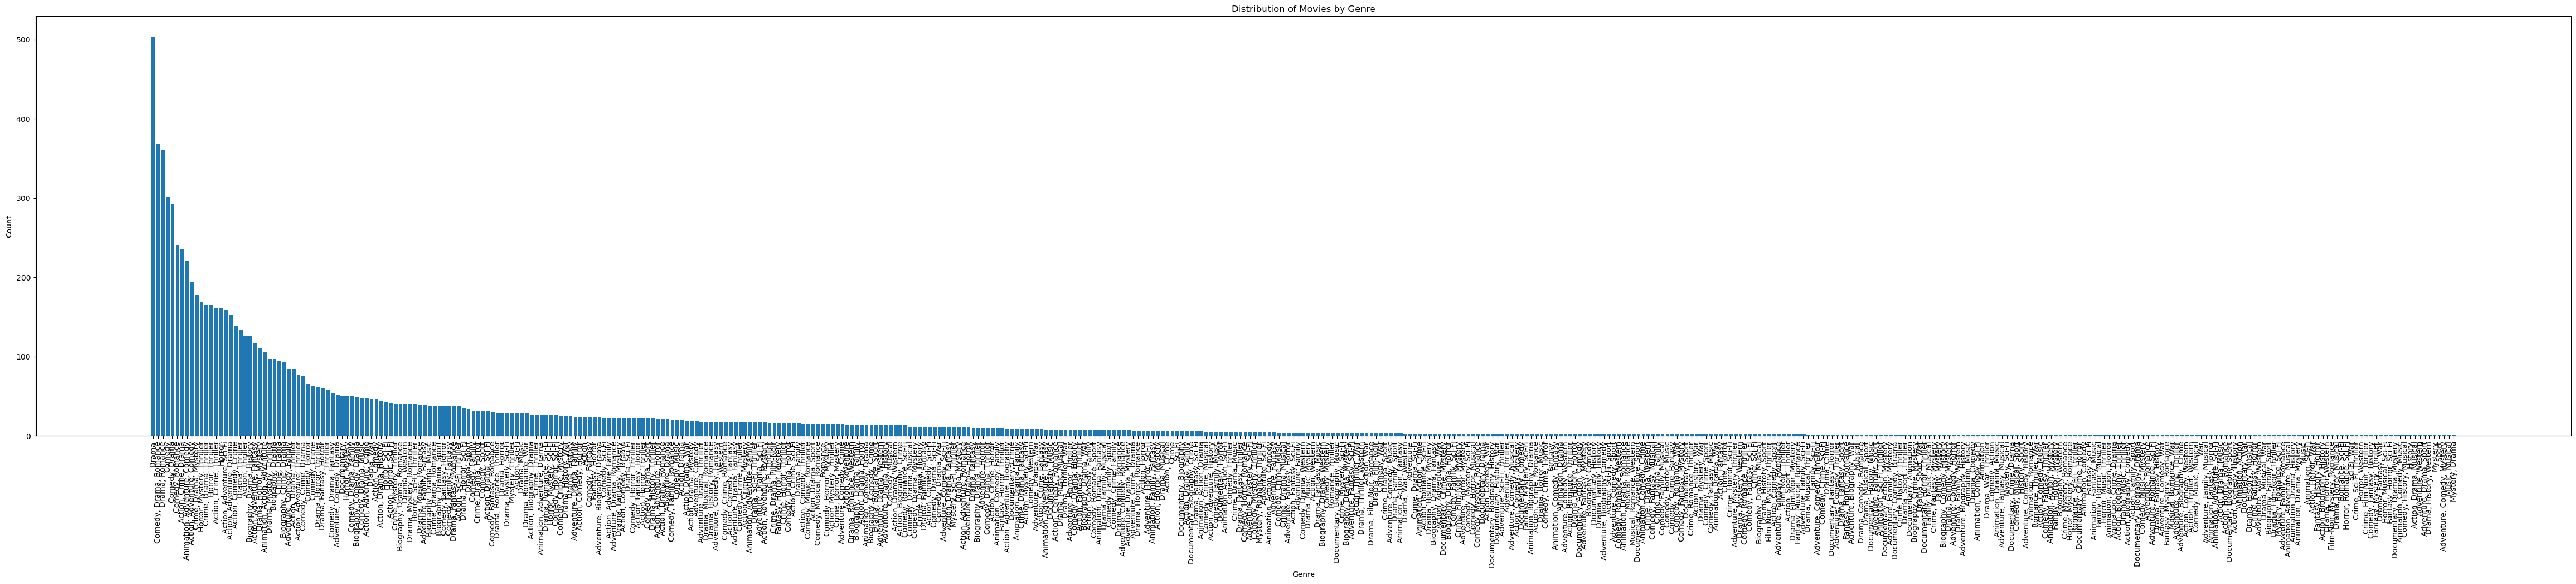

In [6]:
import matplotlib.pyplot as plt
#Example: Bar Graph
genre_counts = data['Genre'].value_counts()
plt.figure(figsize=(60, 10))
plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Movies by Genre')
plt.show()

This plot showing the distribution of movies across different genres, providing a visual representation of the frequency of each genre. This visualization helps identify the most common genres in the dataset, allowing for insights into the diversity of movies and the popularity of specific genres.And after studying the above graph we can say that most of the movies are come from the genre comedy,drama,romance.

**plotting techniques**

there are many ways to improve a plot by adding some features to the plot for example , giving a title to the plot helps us to know what the plot is about?
1. Customizing colors, legends, titles, and labels enhances the visual appeal and clarity of plots.
2. Adjusting axis limits, adding annotations, and using logarithmic scales provide detailed insights into the data.
3. Overlaying plots, adding gridlines, working with subplots, adjusting figure size, and saving plots aid in creating comprehensive and informative visualizations.

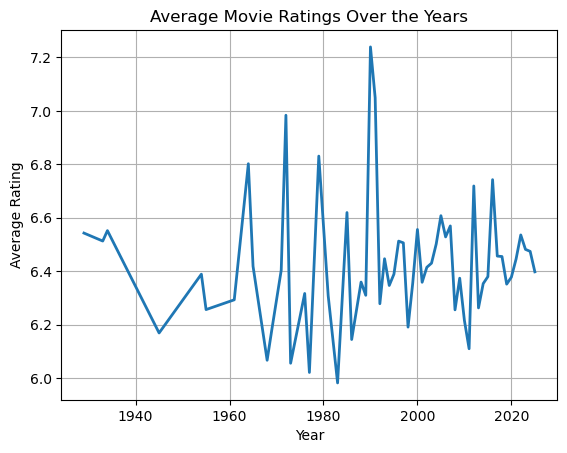

In [7]:
#using grid
yearly_ratings = data.groupby('Year')['Rating'].mean()
#line plot
plt.plot(yearly_ratings.index, yearly_ratings.values,  linestyle='-', linewidth=2, markersize=5)
plt.title('Average Movie Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

Here , we create a line plot showcasing the average movie ratings over the years. By grouping the data by 'Year' and calculating the mean 'Rating', the plot visualizes the trend of movie ratings. 
- we used plt.grid() to show the grid on the plot , this helps us to identify the data points align on the axis .
- above graph is about ratings over the years , in the initial start of imdb before 1940 averagely users rated the movies in between 6.4 to 6.6 
- And in present the average ratings are dropped to 6.4 this means number of users had decreased over these period of time . and also we can see in between 1980 and 2000 there is a sudden hike of average ratings .
- above graph had so many peaks and downs and they are shown as datapoints , but we are unable to identify whcih year and which rating at each point and also plot is in light blue color,and it is not much good looking , so here we can use other techniques to make it better by annotating , changing colors , changing figure size for bigger graphs etc that we will see next ..

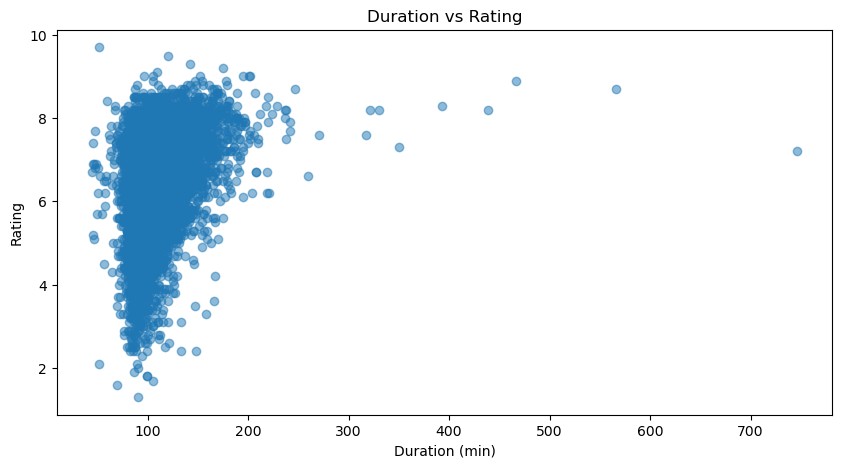

In [8]:
#changing figure sizes

plt.figure(figsize=(10, 5))
plt.scatter(data['Duration (min)'], data['Rating'], alpha=0.5)
plt.title('Duration vs Rating')
plt.xlabel('Duration (min)')
plt.ylabel('Rating')
plt.show()


**changing figure sizes**:
- above plot is about duriation vs rating and it heped us to find that mostly highest rated movies are all have duriation 100 to 200 minutes only 
- and there is some movies have more than 200 minuts ,you can see there is a movie that has more than 700 minuts here .
- Here the figure size is declared as "figsize=(10, 5)" that means it is 10 inches wide and 5 inches height , and we can change the sizes for better viewing.

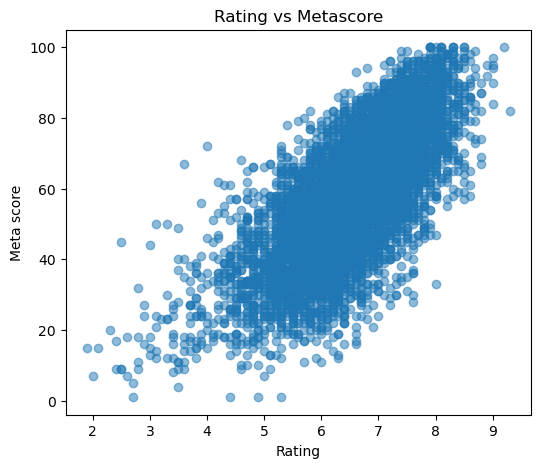

In [9]:
#changing figure sizes
plt.figure(figsize=(6, 5))
plt.scatter(data['Rating'], data['Metascore'], alpha=0.5)
plt.title('Rating vs Metascore')
plt.xlabel('Rating')
plt.ylabel('Meta score')
plt.show()

- above figure is just 6 inches wide and 5 inches height and it shows meta score vs ratings 
- metascore means highest reviews and here this plot is helping us to find that highest ratings have highest metascore

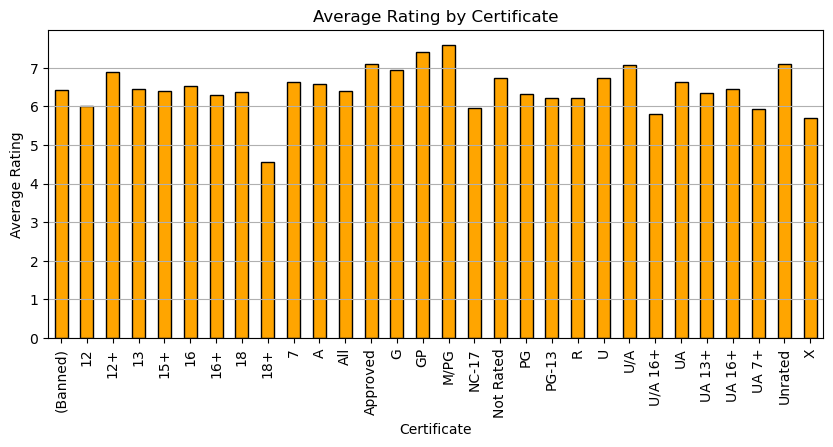

In [10]:
# changing axis of grids and colouring plots 
avg_rating_by_certificate = data.groupby('Certificate')['Rating'].mean().dropna()
#bar plot
plt.figure(figsize=(10, 4))
avg_rating_by_certificate.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Rating by Certificate')
plt.xlabel('Certificate')
plt.ylabel('Average Rating')
plt.grid(axis='y')
plt.show()


- above plot have the grid only on y axis and it is helping us to identify which type of movies getting more ratings 
- here , we can see that the plot is brightly colored, we can change the color of the plot by simply changing color='blue' or something ..

In [11]:
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing values in 'Certificate' or 'Rating' columns
df = data.dropna(subset=['Certificate', 'Rating'])
le = LabelEncoder()
df['Certificate_Encoded'] = le.fit_transform(df['Certificate'])
print(df[['Certificate', 'Certificate_Encoded', 'Rating']].head())


  Certificate  Certificate_Encoded  Rating
0           R                   20     6.4
1       PG-13                   19     7.3
2       PG-13                   19     5.5
3       PG-13                   19     7.3
4           R                   20     7.7


C:\Users\eswar\AppData\Local\Temp\ipykernel_11100\3120039025.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Certificate_Encoded'] = le.fit_transform(df['Certificate'])


- to study the plots better we need to change the data types of the attributes from object to the numerical
- also the relational plots like line plot ,scatter plots and heat maps etc are only allows numerical types to show them on the graphs .
- so here we label encoded the certificate datatype and mapped the values to the labels by putting them in different attributes .
- when we need them to show on the plots we will call the labels to replace the numbers on the graph .

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7312 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                7312 non-null   object 
 1   Year                 7230 non-null   float64
 2   Certificate          7312 non-null   object 
 3   Duration (min)       7312 non-null   float64
 4   Genre                7312 non-null   object 
 5   Rating               7312 non-null   float64
 6   Metascore            6480 non-null   float64
 7   Director             7312 non-null   object 
 8   Cast                 7311 non-null   object 
 9   Votes                103 non-null    float64
 10  Review Count         6878 non-null   float64
 11  Certificate_Encoded  7312 non-null   int32  
dtypes: float64(6), int32(1), object(5)
memory usage: 714.1+ KB


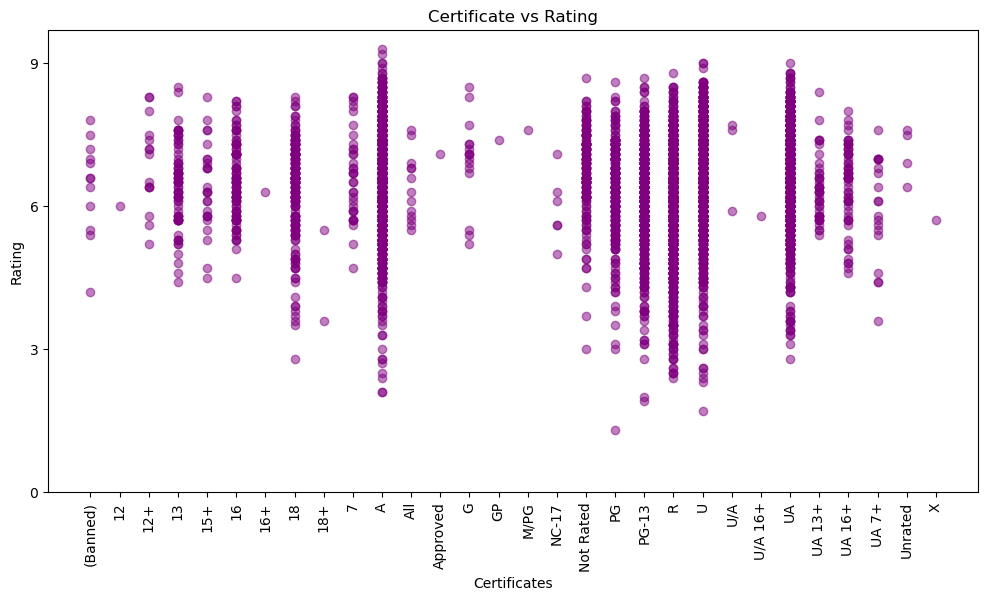

In [13]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Certificate_Encoded'], df['Rating'], alpha=0.5, color='purple',label='movies')
plt.title('Certificate vs Rating')
plt.xlabel('Certificates')
plt.ylabel('Rating')
# Adjusting tick marks
plt.yticks(range(0, 10, 3))
cert_labels = le.inverse_transform(range(len(le.classes_)))
plt.xticks(range(len(cert_labels)), cert_labels, rotation=90)

plt.show()



- above graph is similar to the previously done bar plot 
- here we used scatter plot in place of that bar plot so we can identify the outliers also .
- for example we can see there is only one movie in our data that has been rated 6 and its certificate is X means most violence and horror movie .

**Ticks**:
- in this graph we used ticks to turn the labels , here xticks are used to turn the x labels only , 
- also we made a relational plot between rating and certificate_encoded which is object type we inverse transformed it to the labels of certificate. so in the x ticks we placed number of labels and labels and the rotation of the labels to 90 degree for better views in 'plt.xticks(range(len(cert_labels)), cert_labels, rotation=90)'.
- also we can change the number of limits and limit intervals also by using ticks like this 'plt.yticks(range(0, 10, 3))'.

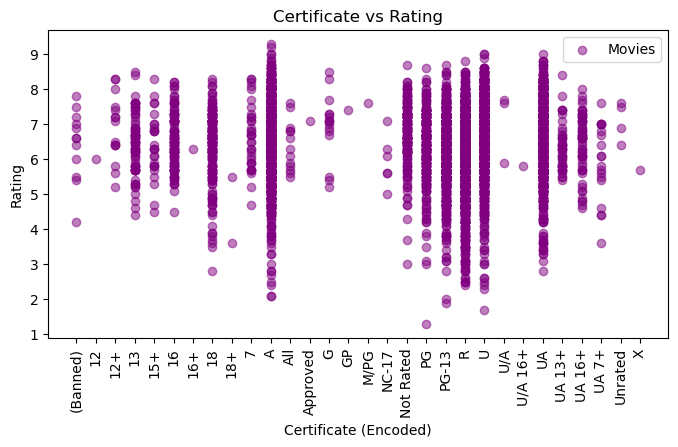

In [14]:
plt.figure(figsize=(8, 4))
#legend
plt.scatter(df['Certificate_Encoded'], df['Rating'], alpha=0.5, color='purple', label='Movies')
plt.title('Certificate vs Rating')
plt.xlabel('Certificate (Encoded)')
plt.ylabel('Rating')
plt.legend()

cert_labels = le.inverse_transform(range(len(le.classes_)))
plt.xticks(range(len(cert_labels)), cert_labels, rotation=90)

plt.show()


**Legend**:
- The previous plot is same as this , previous scatter plot is showing relation between rating and certificate , but this plot is explaining that the dots are the movies by providing a legend that the purple colored dot is a movie ,
- some plots may contain different types of datapoints with different colors and by providing a legend we can identify which dot is which attribute on that graph . so it makes graph more readable 

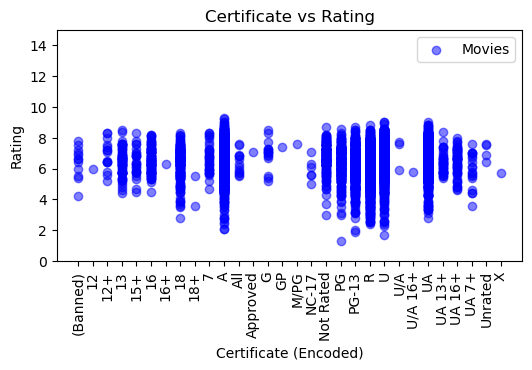

In [15]:
plt.figure(figsize=(6, 3))

plt.scatter(df['Certificate_Encoded'], df['Rating'], alpha=0.5, color='blue', label='Movies')
plt.title('Certificate vs Rating')
plt.xlabel('Certificate (Encoded)')
plt.ylabel('Rating')
plt.legend()

# Adjusting axis limits
plt.ylim(0, 15)

cert_labels = le.inverse_transform(range(len(le.classes_)))
plt.xticks(range(len(cert_labels)), cert_labels, rotation=90)

plt.show()


**Changing limits:**
- here we changed the limits of rating by using 0 to 10 to 0 to 15 by using plt.ylim(0, 15).
- by default the plot will show the limits by difference of 1 and by using axis limits we can have limits by difference 2.and also we can increase or decrease the number of limits for better visuals.
- so here we can identify that no rating has ever reached 10 by studying this plot

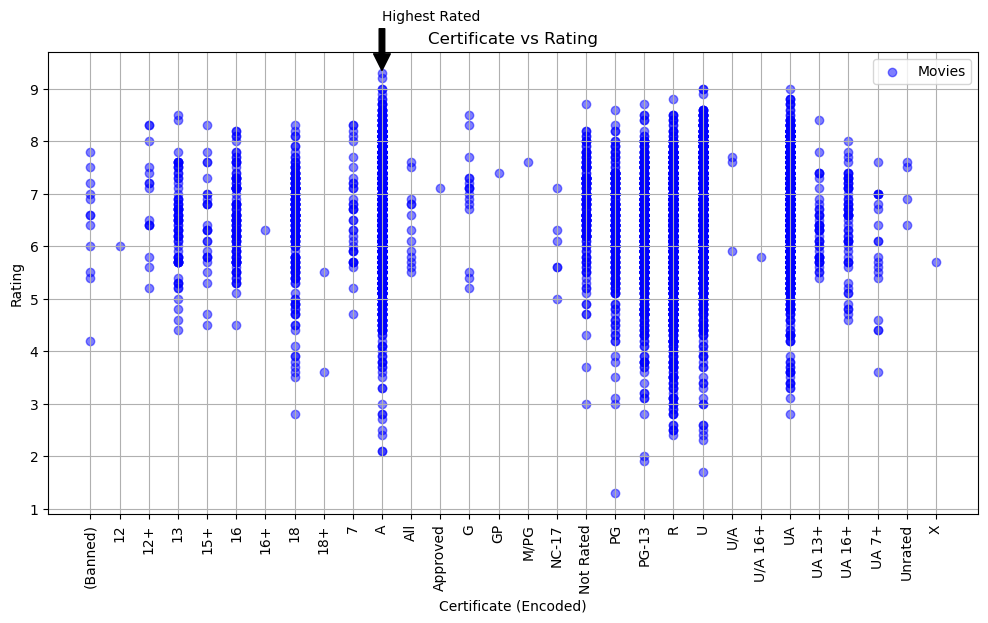

In [16]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Certificate_Encoded'], df['Rating'], alpha=0.5, color='blue', label='Movies')
plt.title('Certificate vs Rating')
plt.xlabel('Certificate (Encoded)')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
# Adding annotations
max_rating_idx = df['Rating'].idxmax()
plt.annotate('Highest Rated', 
             xy=(df['Certificate_Encoded'][max_rating_idx], df['Rating'].max()), 
             xytext=(df['Certificate_Encoded'][max_rating_idx], df['Rating'].max() + 1),
             arrowprops=dict(facecolor='black', shrink=0.05))

cert_labels = le.inverse_transform(range(len(le.classes_)))
plt.xticks(range(len(cert_labels)), cert_labels, rotation=90)

plt.show()


Now, we want find which type of movie has highest ratings of all time . so if we are unable to find that in normal plot cause some datapoints seem like in same axis so, we can use annotations to find it on plot.

**Annotation:**
in the plt.annotate method we use these to display highest rated movie type.
- `'Highest Rated'`: The text label for the annotation.
- `xy=(x, y)`: The coordinates where the annotation arrow points to (in this case, the location of the highest rated movie).
- `xytext=(x, y)`: The coordinates where the text of the annotation is placed (slightly above the highest rating).
- `arrowprops=dict(facecolor='black', shrink=0.05)`: Customizes the appearance of the arrow connecting the annotation text to the data point, setting the arrow color to black and adjusting its size.
 
 we enhanced the visualization with specific details for better understanding and interpretation of the data.

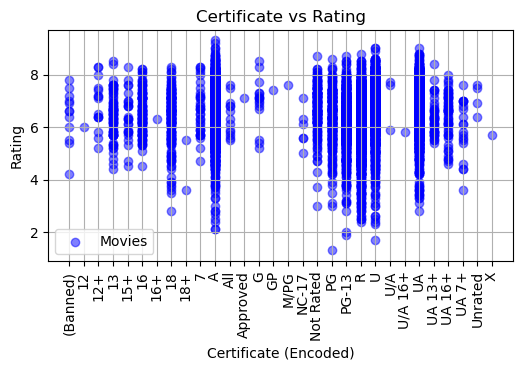

In [17]:
plt.figure(figsize=(6, 3))
plt.scatter(df['Certificate_Encoded'], df['Rating'], alpha=0.5, color='blue', label='Movies')
plt.title('Certificate vs Rating')
plt.xlabel('Certificate (Encoded)')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)

cert_labels = le.inverse_transform(range(len(le.classes_)))
plt.xticks(range(len(cert_labels)), cert_labels, rotation=90)

# Save plot to a file
plt.savefig('certificate_vs_rating.png')
plt.show()


**saving a plot:**
- we can save a plot by using savefig()method in which we can specify in which extinsion we are saving the file.

# Overlaying
Overlaying in data visualization refers to the process of combining multiple plots or graphs on a single figure or canvas. This technique allows for the simultaneous display of different types of data or visualizations, enabling comparisons and providing a more comprehensive view of the information.

1. **It allows for the combination of different plot types**, such as scatter plots, line plots, bar charts, histograms, etc., on the same figure
2. **Overlaying can be achieved using subplots** or by creating multiple figures and arranging them side-by-side\

3. **Adjusting the transparency (alpha value) of the overlaid plots** can help make the overlapping parts more visible and interpretable

4. **The order of the plots matters**, as plots on top will obscure those underneath. Reordering the plots can bring a specific plot to the foreground

5. **Overlaying enhances data exploration and comparison** by providing a unified view of multiple aspects of the data

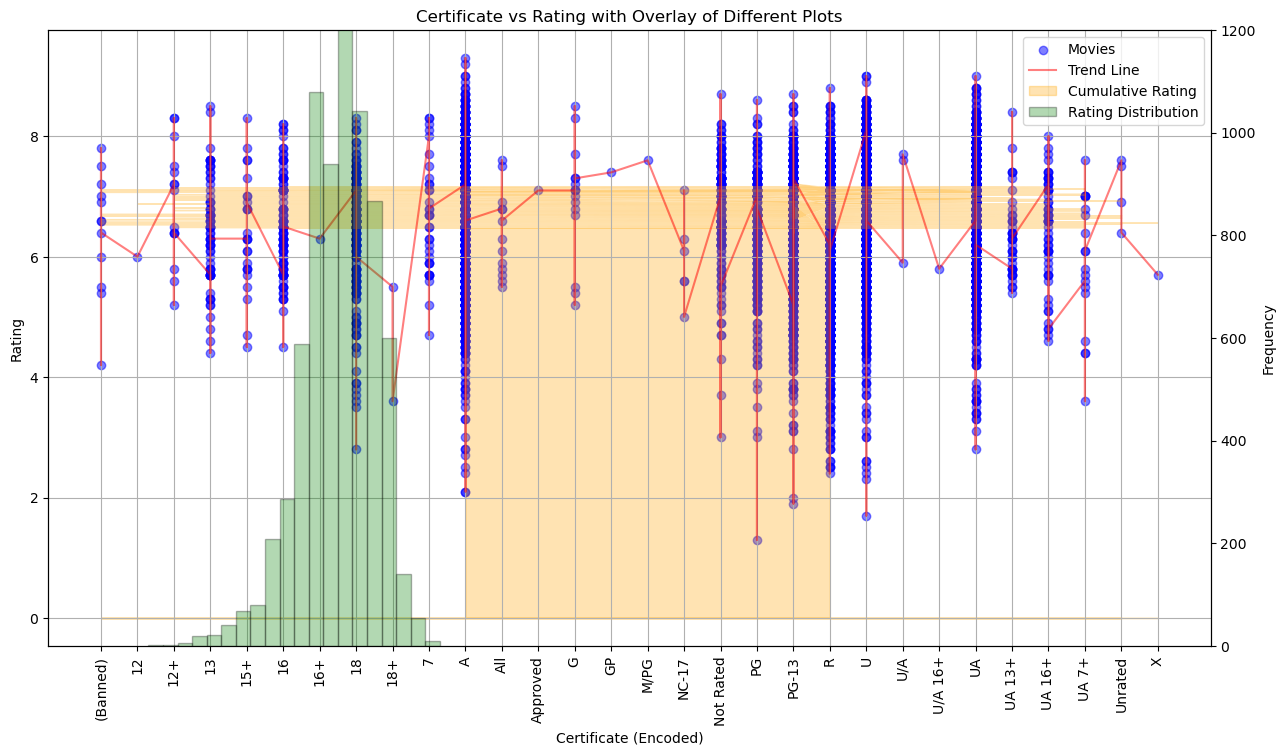

In [18]:
#OVERLAYING
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
df_copy = df.copy()

# Calculate the cumulative mean of the 'Rating' column
df_copy['Rating_Cumulative'] = df_copy['Rating'].expanding().mean()

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(15, 8))

# Scatter Plot
ax1.scatter(df_copy['Certificate_Encoded'], df_copy['Rating'], alpha=0.5, color='blue', label='Movies')
ax1.set_title('Certificate vs Rating with Overlay of Different Plots')
ax1.set_xlabel('Certificate (Encoded)')
ax1.set_ylabel('Rating')

# Adding labels for encoded categories
cert_labels = le.inverse_transform(range(len(le.classes_)))
ax1.set_xticks(range(len(cert_labels)))
ax1.set_xticklabels(cert_labels, rotation=90)

# Overlay Line Plot (Trend Line)
sorted_df = df_copy.sort_values(by='Certificate_Encoded')
ax1.plot(sorted_df['Certificate_Encoded'], sorted_df['Rating'], color='red', alpha=0.5, label='Trend Line')

# Overlay Histogram (Distribution of Ratings)
ax2 = ax1.twinx()
ax2.hist(df_copy['Rating'].dropna(), bins=20, color='green', edgecolor='black', alpha=0.3, label='Rating Distribution')
ax2.set_ylabel('Frequency')
ax2.set_ylim(0, 1200)  # Adjust based on data

# Overlay Area Plot (Cumulative Distribution)
ax1.fill_between(df_copy['Certificate_Encoded'], df_copy['Rating_Cumulative'], color='orange', alpha=0.3, label='Cumulative Rating')

# Adding Gridlines
ax1.grid(True)

# Adding Legends
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()

From the above plot , it is showing a total of four plots in a single plot . To improve our plot readability we used some techniques like giving a legend and grid lines ..

1. **Scatter Plot**: The scatter plot displays individual data points representing movies, showing how ratings vary across different certificate categories.

2. **Line Plot (Trend Line)**: The trend line overlaid on the scatter plot illustrates the overall trend or pattern in the relationship between certificate and rating.

3. **Histogram (Distribution of Ratings)**: The histogram on a secondary y-axis provides a visual representation of the distribution of ratings, indicating the frequency of different rating values.

4. **Area Plot (Cumulative Distribution)**: The area plot showcases the cumulative mean of ratings over the dataset, indicating the overall trend of ratings as certificate values increase.

5. **Gridlines**: The gridlines enhance the readability of the plot by providing a reference for the data points on the plot.

6. **Legends**: The legends help identify the different elements in the plot, such as the scatter plot, trend line, histogram, and cumulative rating, making it easier to interpret the visualized data.

By combining these elements in a single plot, the visualization offers a comprehensive view of the relationship between certificate and rating, along with additional insights into the distribution and cumulative trends of ratings within the dataset.

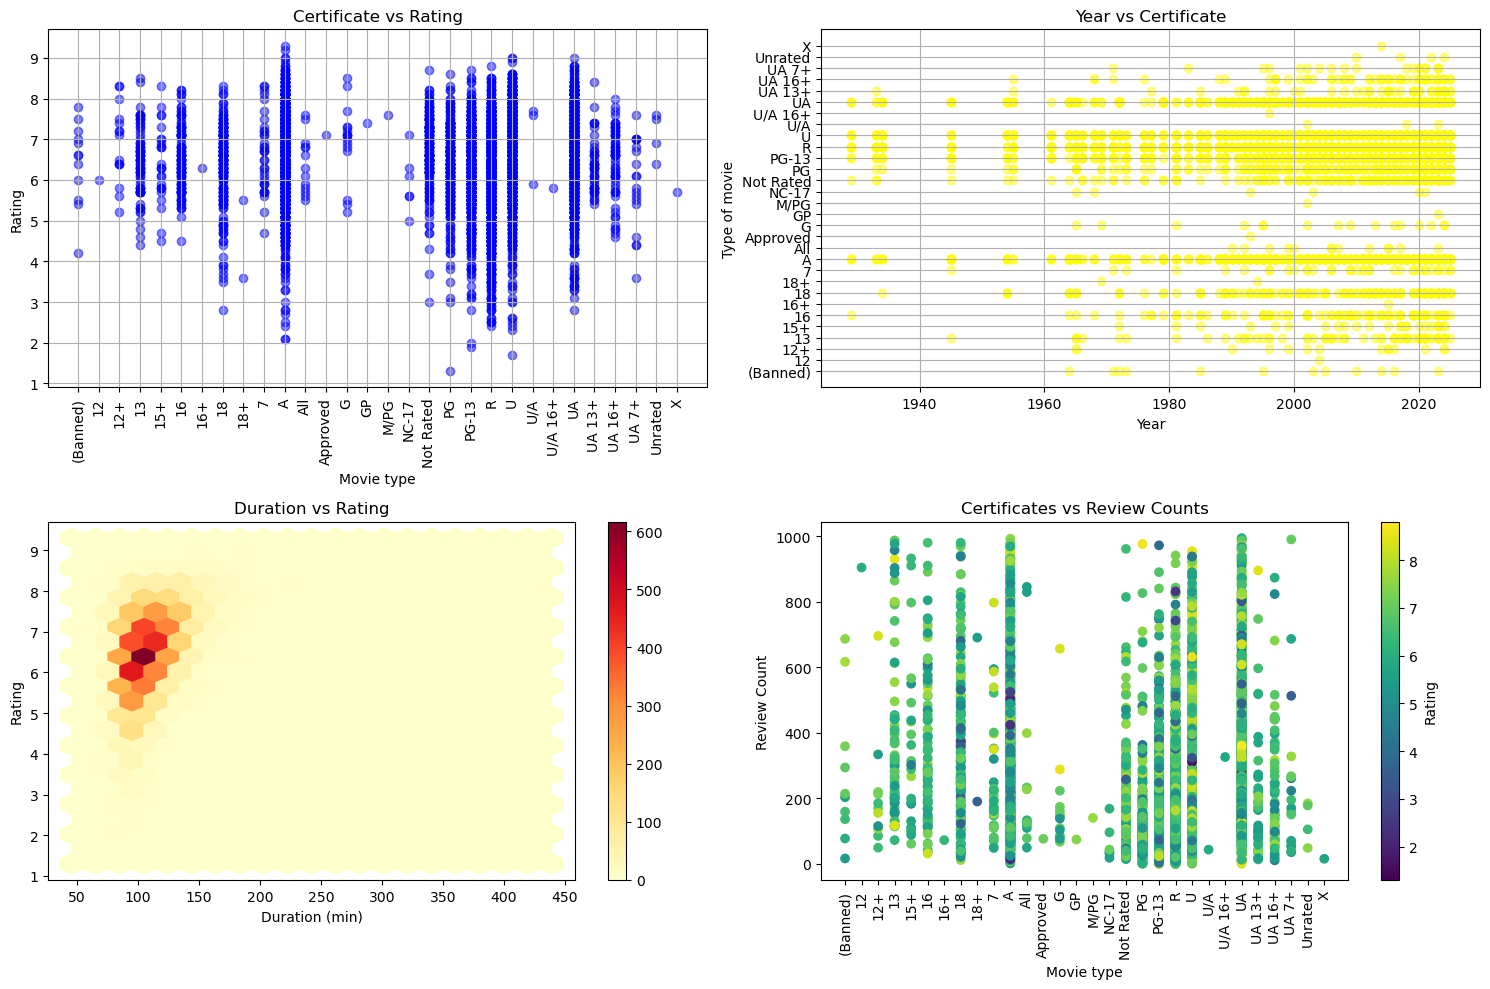

In [19]:

# Create the figure and subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Scatter plot: Certificate vs Rating
ax1.scatter(df['Certificate_Encoded'], df['Rating'], alpha=0.5, color='blue')
ax1.set_title('Certificate vs Rating')
ax1.set_xlabel('Movie type')
ax1.set_ylabel('Rating')
cert_labels = le.inverse_transform(range(len(le.classes_)))
ax1.set_xticks(range(len(cert_labels)))
ax1.set_xticklabels(cert_labels, rotation=90)
ax1.grid(True)

# Scatter: Year vs certificate
ax2.scatter(df['Year'], df['Certificate_Encoded'], alpha=0.5, color='yellow')
ax2.set_title('Year vs Certificate')
ax2.set_xlabel('Year')
ax2.set_ylabel('Type of movie')
ax2.set_yticks(range(len(cert_labels)))
ax2.set_yticklabels(cert_labels, rotation=0)
ax2.grid(True)


# Duration vs Rating (Heatmap)
hb = ax3.hexbin(df['Duration (min)'], df['Rating'], gridsize=20, cmap='YlOrRd')
ax3.set_title('Duration vs Rating')
ax3.set_xlabel('Duration (min)')
ax3.set_ylabel('Rating')
fig.colorbar(hb, ax=ax3)

# Certificates vs Review Counts (Pair Plot)
scatter = ax4.scatter(df['Certificate_Encoded'], df['Review Count'], c=df['Rating'], cmap='viridis')
ax4.set_title('Certificates vs Review Counts')
ax4.set_xlabel('Movie type')
ax4.set_ylabel('Review Count')
ax4.set_xticks(range(len(cert_labels)))

ax4.set_xticklabels(cert_labels, rotation=90)
fig.colorbar(scatter, ax=ax4, label='Rating')

plt.tight_layout()
plt.show()

# Sub plots:
 Sub plots are nothing but the multiple plots in a single image.
 Normally one image contains only one plot and we can't study one plot at a time , so we use subplots to show multiple plots in one image so we can compare also .
we can create sub plots by using the GridSpecor and normally using pyplot. but in every way we have to first declare a grid of number of columns and number of rows , and in each cell we fit a plot.

Here create a 2x2 grid of subplots by using pyplot to show

1. **Certificate vs Rating (Scatter Plot)**:
   - Plots the relationship between movie certificate (encoded) and rating.
   - Sets the x-axis labels to the decoded certificate labels.
   - Adds a grid to the plot.

2. **Year vs Certificate (Scatter Plot)**:
   - Plots the relationship between movie year and certificate (encoded).
   - Sets the y-axis labels to the decoded certificate labels.
   - Adds a grid to the plot.

3. **Duration vs Rating (Hexbin Plot)**:
   - Creates a hexagonal binning heatmap to visualize the relationship between movie duration and rating.
   - Uses the 'YlOrRd' colormap to represent the density of data points.
   - Adds a colorbar to the plot.

4. **Certificates vs Review Counts (Scatter Plot with Color Coding)**:
   - Plots the relationship between movie certificate (encoded) and review count.
   - Color-codes the scatter points based on the movie rating using the 'viridis' colormap.
   - Sets the x-axis labels to the decoded certificate labels.
   - Adds a colorbar to the plot, labeling it as 'Rating'.

The `plt.tight_layout()` function is used to adjust the spacing between subplots.
- above plots can be used to identify these :
  - A certificate movies and most Movies with More violence gets high ratings
  - Most movies are A,U,PG,PG-13 and violence related are released than normal movies. 
  - Many Highest rated movies are near to 100 minutes duriation only .
  - last one shows most reviews are given to violent movies and ratings also high for some violent movies

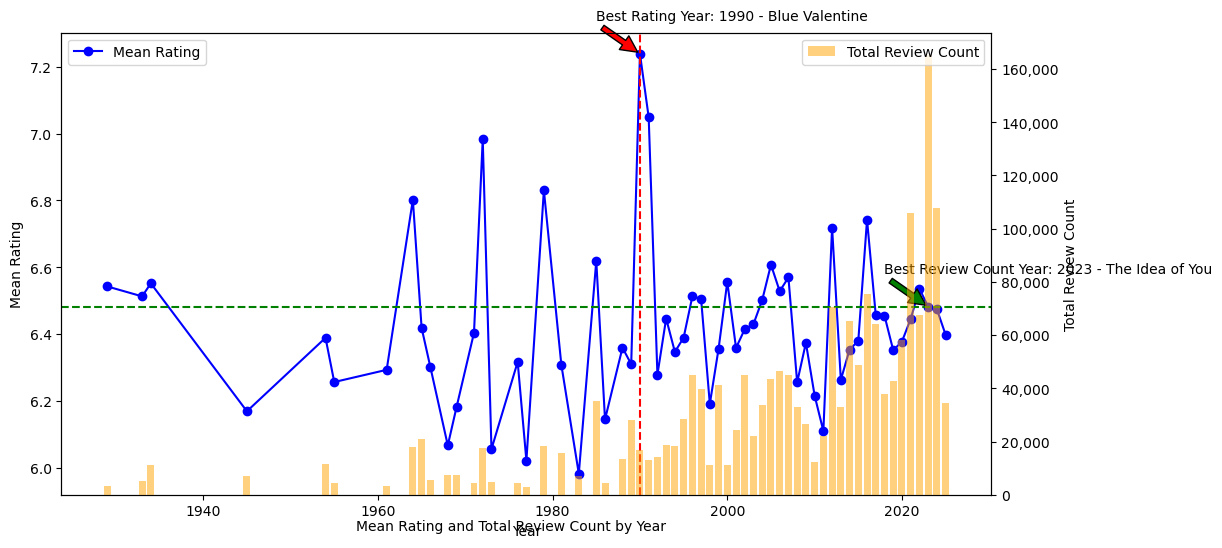

In [20]:
import matplotlib.ticker as ticker

# Group the data by 'Year' and calculate the mean rating and sum of review counts
yearly_data = data.groupby('Year').agg({'Rating': 'mean', 'Review Count': 'sum'}).reset_index()

# Sort the data by 'Rating' and 'Review Count' in descending order to find the best year
best_year_rating = yearly_data.sort_values(by='Rating', ascending=False).iloc[0]
best_year_review = yearly_data.sort_values(by='Review Count', ascending=False).iloc[0]

# Get the movie title for the best year
best_movie_rating = df[df['Year'] == best_year_rating['Year']]['Title'].iloc[0]
best_movie_review = df[df['Year'] == best_year_review['Year']]['Title'].iloc[0]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the mean rating by year
ax.plot(yearly_data['Year'], yearly_data['Rating'], marker='o', color='blue', label='Mean Rating')
ax.set_xlabel('Year')
ax.set_ylabel('Mean Rating')
ax.legend(loc='upper left')

# Annotate the year with the best rating
ax.annotate(f'Best Rating Year: {int(best_year_rating["Year"])} - {best_movie_rating}', 
             xy=(best_year_rating["Year"], best_year_rating["Rating"]), 
             xytext=(best_year_rating["Year"]-5, best_year_rating["Rating"]+0.1),
             arrowprops=dict(facecolor='red', shrink=0.05))

# Annotate the year with the best review count
ax.annotate(f'Best Review Count Year: {int(best_year_review["Year"])} - {best_movie_review}', 
             xy=(best_year_review["Year"], best_year_review["Rating"]), 
             xytext=(best_year_review["Year"]-5, best_year_review["Rating"]+0.1),
             arrowprops=dict(facecolor='green', shrink=0.05))

# Plotting the total review count by year
ax2 = ax.twinx()

# Define a custom function to format the review count values
def format_review_count(x, pos):
    return f"{x:,.0f}"

# Set the custom formatter for the y-axis of ax2
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(format_review_count))

ax2.bar(yearly_data['Year'], yearly_data['Review Count'], color='orange', alpha=0.5, label='Total Review Count')
ax2.set_ylabel('Total Review Count')
ax2.legend(loc='upper right')

# Adding vertical line for the best rating year
ax.axvline(x=best_year_rating['Year'], color='red', linestyle='--', label='Best Rating Year')

# Adding horizontal line for the best review count year
ax.axhline(y=best_year_review['Rating'], color='green', linestyle='--', label='Best Review Count Year')

# Set the title at the bottom of the figure
fig.text(0.5, 0.05, 'Mean Rating and Total Review Count by Year', ha='center')

plt.show()

# **Finding Best movies all time by ratings and reviews counts :**
To find the two movies based on highest ratings and highest reviews counts we need to show it ona overlaying plot and we have to follow these steps to do that :

1. **Grouping the data by 'Year'**: The data is grouped by 'Year' to calculate the mean rating and sum of review counts for each year.

2. **Finding the best year**: The code identifies the year with the highest mean rating and the year with the highest total review count.

3. **Creating a figure and axis**: A figure and axis are created using `plt.subplots()`.

4. **Plotting the mean rating by year**: A line plot is created to show the mean rating for each year, using `ax.plot()`.

5. **Annotating the best rating year**: An annotation is added to indicate the year with the best mean rating, including the movie title for that year, using `ax.annotate()`.

6. **Annotating the best review count year**: An annotation is added to indicate the year with the highest total review count, including the movie title for that year, using `ax.annotate()`.

7. **Plotting the total review count by year**: A bar plot is created to show the total review count for each year, using `ax2.bar()`.

8. **Formatting the review count values**: A custom function is defined to format the review count values with commas using `ticker.FuncFormatter()`.

9. **Adding vertical and horizontal lines**: Vertical and horizontal lines are added to indicate the best rating year and best review count year, respectively, using `ax.axvline()` and `ax.axhline()`.

10. **Setting the title**: A title is added at the bottom of the figure using `fig.text()`.

This plot provides a comprehensive view of the mean rating and total review count trends over the years, highlighting the best years for each metric and allowing for easy comparison between the two.

- And finally we did found two movies that are "Blue valentine from 1990 based on highest ratings" and "The Idea of you from 2023 based on the highest reviews".
- we also can see that the blue valentine got less reviews as it is from 1990 and idea of you got lesser rating from more people , so we can suggest that blue valentine will be better than idea of you from this plot . 